<a href="https://colab.research.google.com/github/Dong2Yo/DATA3550_1232/blob/main/Lectures/Chp9_st.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Review**   Serializing Objects

[serialization](https://machinelearningmastery.com/a-gentle-introduction-to-serialization-for-python/#:~:text=Serialization%20refers%20to%20the%20process,the%20reverse%20process%20of%20deserialization.)


In [ ]:
import pickle
rooms = {
    'DATA3150':'CAT227',
    'DATA3250':'CAT506',
    'DATA3350':'CAT324',
    'DATA3450':'CAT412',
    'DATA3550':'CAT223'
    }

with open("rooms.dat", "wb") as output_file:
  pickle.dump(rooms, output_file)

In [ ]:
import pickle
with open("rooms.dat", "rb") as input_file:
  rm = pickle.load(input_file)
rm

{'DATA3150': 'CAT227',
 'DATA3250': 'CAT506',
 'DATA3350': 'CAT324',
 'DATA3450': 'CAT412',
 'DATA3550': 'CAT223'}

# **Chapter 9**   Objects and Classes

* To understand the concepts of classes, objects, and encapsulation
* To implement instance variables, methods, and constructors
* To be able to design, implement, and test your own classes
* To understand the behavior of object references

Objected-Based Programming vs Object-Oriented Programming

# **9.1 Object-Oriented Programming**

Computer scientists invented object-oriented programming, a programming style in which tasks are solved by collaborating objects. Each object has its own set of data, together with a set of methods that act upon the data.

**In Python, a class describes a set of objects with the same behavior.**

In [ ]:
x = 1
type(x)

int

In [ ]:
print(type(x))

<class 'int'>


In [ ]:
greeting = "Hello, World!"
print(type(greeting))

<class 'str'>


In [ ]:
print(greeting.upper())


HELLO, WORLD!


In [ ]:
print(x.upper())

AttributeError: ignored

In [ ]:
def my_function():
  print("Good Day!")

In [ ]:
print(type(my_function))

<class 'function'>


## 9.1.1 Defining Classes


    class MyClass :
    
        body

In [ ]:
class Circle:
  pi = 3.1415926
  def __init__(self, radius) :
    self.radius = radius

  def area(self) :
    return self.radius * self.radius * self.pi

In [ ]:
my_circle = Circle(5)
my_circle.pi = 1
print(my_circle.area())

25


In [ ]:
my_circle1 = Circle()
print(my_circle1.area())

3.14


**The set of all methods provided by a class, together with a description of their behavior, is called the public interface of the class.**

Every class has a public interface: a collection of methods through which the objects of the class can be manipulated.

When you work with an object of a class, you do not know how the object stores its data, or how the methods are implemented. You need not know how a str object organizes a character sequence, or how a list stores its elements.

All you need to know is the public interface — which methods you can apply, and what these methods do. The process of providing a public interface, while hiding the implementation details, is called **encapsulation**.

**Encapsulation is the act of providing a public interface and hiding the implementation details.**





**Encapsulation enables changes in the implementation without affecting users of a class.**

# **9.2 Implementing a Simple Class**

Our first example is a class that models a tally counter, a mechanical device that is used to count people—for example, to find out how many people attend a concert or board a bus

Here is an example of **using the Counter class**.

First, we **construct an object of the class**:

            tally = Counter()


Next, we **invoke methods** on our object.

First, we reset the counter to 0 by invoking the **reset method**.

Then we invoke the **click method twice**, simulating two button pushes.

Finally, we invoke the **getValue method** to check how many times the button was pushed.

			tally.reset()
			tally.click()
			tally.click()
			result = tally.getValue()   # Sets result to 2

We can invoke the methods again, and the result will be different:

            tally.click()
			result = tally.getValue()   # Sets result to 3

As you can see, the tally object remembers the effects of prior method calls.

In [ ]:
##
#  This module defines the Counter class.
#

## Models a tally counter whose value can be incremented, viewed, or reset.
#
class Counter :
   ## Gets the current value of this counter.
   #  return the current value
   #
   def getValue(self) :
      return self._value

   ## Advances the value of this counter by 1.
   #
   def click(self) :
      self._value = self._value + 1

   ## Resets the value of this counter to 0.
   #
   def reset(self) :
      self._value = 0

In [ ]:
# from counter import Counter
tally = Counter()
tally.reset()
tally.click()
tally.click()




In [ ]:
result = tally.getValue()
print("Value:", result)

tally.click()
result = tally.getValue()
print("Value:", result)

Value: 2
Value: 3


When implementing the Counter class, we need to specify **how each Counter object stores its data**.

In this simple example, that is very straightforward. Each counter needs a variable that keeps track of how many times the counter has been advanced.

**An object’s instance variables store the data required for executing its methods.**

An object stores its data in **instance variables**. **An instance of a class is an object of the class**.

Thus, an instance variable is a storage location that is present in each object of the class.

In our example, each Counter object has a single instance variable named **_value**.

By convention, instance variables in Python start with an underscore to indicate that they should be private. Instance variables are part of the implementation details that should be hidden from the user of the class.

**An instance variable should only be accessed by the methods of its own class**.

The Python language does not enforce this restriction. However, the underscore indicates to class users that they should not directly access the instance variables.
**Each object of a class has its own set of instance variables.**

For example, if concertCounter and boardingCounter are two objects of the Counter class, then each object has its own _value variable

In [ ]:
tally._value = 5
print(tally.getValue())

5


In [ ]:
result = tally.getValue
print(result)

<bound method Counter.getValue of <__main__.Counter object at 0x7f468921c850>>


A method definition is very similar to a function with these exceptions:

            •A method is defined as part of a class definition.
			•The first parameter variable of a method is called self.

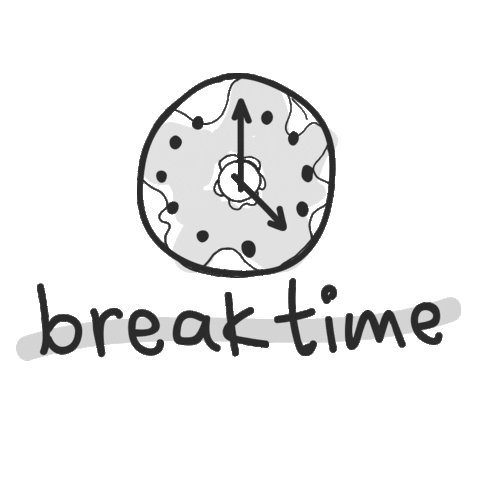

# **9.3 Specifying the Public Interface of a Class**

When designing a class, you start by specifying its public interface.

The public interface of a class consists of all methods that a user of the class may want to apply to its objects.

**CASE**

We want to use objects that simulate cash registers.
A cashier who rings up a sale presses a key to start the sale, then rings up each item. A display shows the amount owed as well as the total number of items purchased.

In our simulation, we want to call the following methods on a cash register object:

			•Add the price of an item.
			•Get the total amount owed, and the count of items purchased.
			•Clear the cash register to start a new sale.

**You can use method headers and method comments to specify the public interface of a class.**

**The method definitions and comments make up the public interface of the class. The data and the method bodies make up the private implementation of the class.**

# **9.4 Designing the Data Representation**

**An object stores its data in instance variables.**



**For each accessor method, an object must either store the result or the data necessary to compute the result.**

In [ ]:
register1.getTotal()

In [ ]:
register1.addItem(1.95)

You should not assume that you can clear the sum in a call to getTotal.

Your data representation should allow for method calls that come in arbitrary order, in the same way that occupants of a car can push the various buttons and levers in any order they choose.

### Programming Tip 9.1

**Make All Instance Variables Private, Most Methods Public**

All instance variables should be private and most methods should be public.

Although most object-oriented languages provide a mechanism to explicitly hide or protect private members from outside access, Python does not.

Instead, the designer of a class has to indicate which  instance variables and methods are supposed to be private. It’s then the responsibility of the class user not to violate the privacy.

It is common practice among Python programmers to **use names that begin with a single underscore for private instance variables and methods**. The single underscore serves as a flag to the class user that those members are private. You then must trust that the class user will not attempt to access these items directly. This technique is recognized by documentation generator tools that flag private instance variables and methods in the documentation.

You should always use encapsulation, in which all instance variables are private and are only manipulated with methods.

Typically, methods are public. However, sometimes you have a method that is used only as a helper method by other methods. In that case, you should make the helper method private by using a name that begins with a single underscore.

In [ ]:
class CashRegister:

  def __init__(self):
    self._itemcount = 0
    self._totalprice = 0.00

  def additems(self, price) :
    self._itemcount += 1
    self._totalprice = self._totalprice + price

  def gettotal(self):
    return self._totalprice

  def getcount(self):
    return self._itemcount

  def clear(self):
    self._itemcount = 0
    self._totalprice = 0.00


In [ ]:
trans1 = CashRegister()
trans1.additems(10)
trans1.additems(3.99)
trans1.additems(19.99)
print(f'{trans1.getcount()} items')
print("%.2f" % trans1.gettotal())

3 items
33.98


# **9.5 Constructors**

**A constructor initializes the instance variables of an object.**

A constructor defines and initializes the instance variables of an object. The constructor is automatically called whenever an object is created.

To create an instance of a class, you use the name of the class as if it were a function along with any arguments required by the constructor. To create an instance of the CashRegister class, we use the command:

            register = CashRegister()

Here an object is created and the constructor of the CashRegister class is automatically called. This particular constructor needs no arguments.

The constructor is responsible for defining and initializing all of the instance variables that are to be contained in the object.

After the constructor completes its work, a reference to the newly created and initialized object is returned. The reference is saved in a variable so we can later call methods on the object.

Python uses the special name __init__ for the constructor because its purpose is to initialize an instance of the class:

            def __init__(self) :
			   self._itemCount = 0
			   self._totalPrice = 0.0

**Note** the self parameter variable in the constructor definition.

**The first parameter variable of every constructor must be self**.

When the constructor is invoked to construct a new object, the self parameter variable is set to the object that is being initialized.

When you first refer to an instance variable in the constructor, that instance variable is created. For example,

            self._itemCount = 0

creates an _itemCount instance variable in the newly created object and initializes it with zero.

Sometimes, it can be useful to allow objects to be created in different ways. For example, we can create an empty list using the list constructor in this form

            empty = list()
or create a duplicate copy of an existing list using another version of the list constructor

            duplicate = list(values)

**Default arguments can be used with a constructor to provide different ways of creating an object.**

Python allows you to define **only one constructor per class**.

But you can define a constructor with default argument values that simulate multiple definitions.

Consider, for example, a BankAccount class that needs two forms for the constructor: one that accepts an argument for the initial balance and another that uses a default initial balance of 0.

This can be achieved by including a default argument for the initialBalance parameter variable,

			class BankAccount :
			   def __init__(self, initialBalance = 0.0) :
			      self._balance = initialBalance

The user of the class can choose which form to use when creating an object. If no value is passed to the constructor when a BankAccount object is created,

            joesAccount = BankAccount()
the default value will be used. If a value is passed to the constructor

            joesAccount = BankAccount(499.95)

that value will be used instead of the default one.

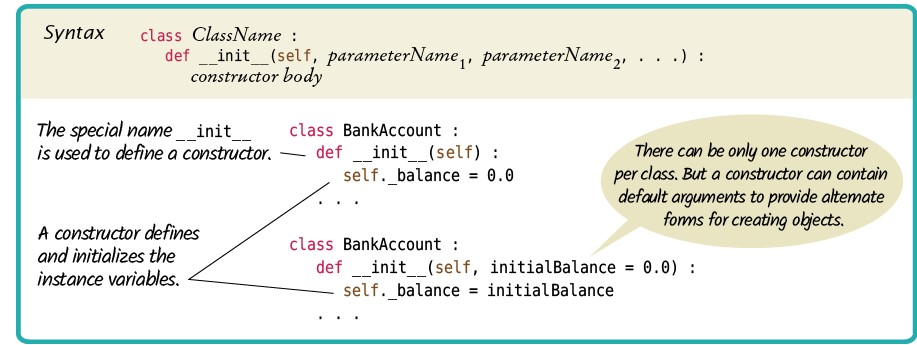

# **9.6 Implementing Methods**

When implementing a class, you need to provide the bodies for all methods. Implementing a method is very similar to implementing a function, with one essential difference: You access the instance variables of the object in the method body.

For example, here is the implementation of the addItem method of the CashRegister class.

           def addItem(self, price) :
			   self._itemCount = self._itemCount + 1
			   self._totalPrice = self._totalPrice + price

**The object on which a method is applied is automatically passed to the self parameter variable of the method.**

As with the constructor, every method must include the special self parameter variable, and it must be listed first.

When a method is called,

            register1.addItem(2.95)

a reference to the object on which the method was invoked (register1) is automatically passed to the self parameter variable. The remaining parameter variables must be supplied as arguments of the method call.

In the example, the price parameter variable is set to 2.95.

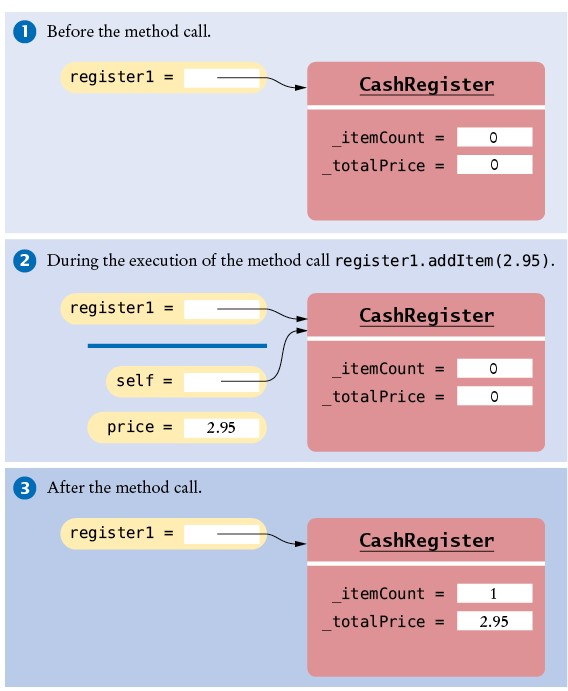

**In a method, you access instance variables through the self parameter variable.**

To access an instance variable, such as _itemCount or _totalPrice, in a method, you must access the variable name through the self reference.

This indicates that you want to access the instance variables of the object on which the method is invoked, and not those of some other CashRegister object.

The first statement in the addItem method is

            self._itemCount = self._itemCount + 1

Which _itemCount is incremented? In this call, it is the _itemCount of the register1 object.

When one method needs to call another method on the same object, you invoke the method on the self parameter.

Suppose we want to provide a CashRegister method that adds multiple instances of the same item. An easy way to implement this method is to repeatedly call the addItem method:

            def addItems(self, quantity, price) :
			   for i in range(quantity) :
			      self.addItem(price)

Here, the addItem method is invoked on the object referenced by self. That is the object on which the addItems method was invoked. For example, in the call

            register1.addItems(6, 0.95)

the addItem method is invoked six times on the register1 object.

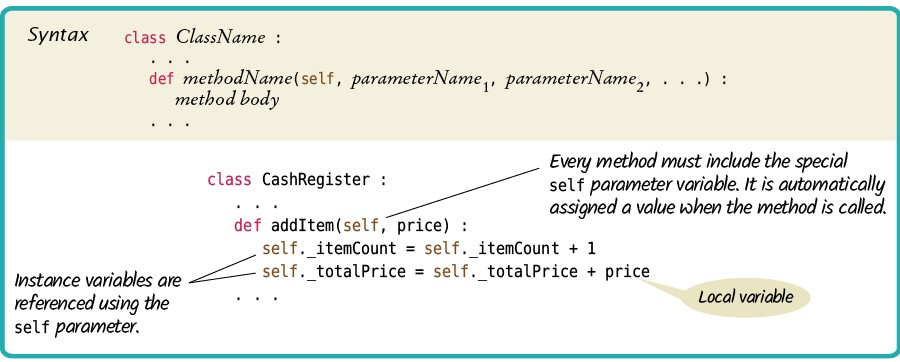

In [ ]:
##
#  This module defines the CashRegister class.
#

## A simulated cash register that tracks the item count and the total amount due.
#
class CashRegister :
   ## Constructs a cash register with cleared item count and total.
   #
   def __init__(self) :
      self._itemCount = 0
      self._totalPrice = 0.0

   ## Adds an item to this cash register.
   #  param price the price of this item
   #
   def addItem(self, price) :
      self._itemCount = self._itemCount + 1
      self._totalPrice = self._totalPrice + price

   ## Gets the price of all items in the current sale.
   #  return the total price
   #
   def getTotal(self) :
      return self._totalPrice

   ## Gets the number of items in the current sale.
   #  return the item count
   #
   def getCount(self) :
      return self._itemCount

   ## Clears the item count and the total.
   #
   def clear(self) :
      self._itemCount = 0
      self._totalPrice = 0.0

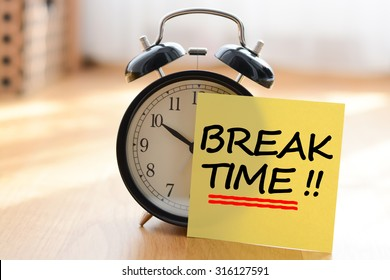

# **9.7 Testing a Class**

After we complete the implementation of a class, in the long run, the class may become a part of a larger program that interacts with users, stores data in files, and so on.

However, before integrating a class into a program, it is always a good idea to **test it in isolation**.

**Testing in isolation, outside a complete program, is called unit testing.**

#### A unit test verifies that a class works correctly in isolation, outside a complete program.

To test your class you have two choices.

* Some interactive development environments provide access to the Python shell in which individual statements can be executed. You can test a class simply by constructing an object, calling methods, and verifying that you get the expected return values.

In [ ]:
from google.colab import files

uploaded = files.upload()

Interactive testing is quick and convenient but it has a drawback.

When you find and fix a mistake, you need to type in the tests again.

As your classes get more complex, you should write tester programs. A tester program is a driver module that imports the class and contains statements to run methods of your class.

A tester program typically carries out the following steps:

			1.Construct one or more objects of the class that is being tested.
			2.Invoke one or more methods.
			3.Print out one or more results.
			4.Print the expected results.

In [ ]:
from google.colab import files

uploaded = files.upload()

# **Review 1**

In [ ]:
from google.colab import files

uploaded = files.upload()

Now that we've seen the Account class in action, let's go ahead and look at the source code that implements the class definition. Now for those of you who are coming from other C based object oriented programming languages like C++, C#, Java, et cetera, you are going to see that python has some significantly different syntax for implementing classes.

In [ ]:
Account?

Object `Account` not found.


#### 1. Please modify the Account class and add a withdraw method to that class.

     The amount being withdrawn has to be a positive number;
     The amount being withdrawn has to be less than or equal to the account balance.

In [ ]:
from google.colab import files

uploaded = files.upload()

If you're coming in to Python from C++, Java, or C Sharp, you would notice that, we didn't have keywords like public and private inthe Account class. In Python we don't have those keywords. In fact, everything that you define in a class in Python is technically accessible to anybody interacting with your object.

As the previous exmaple shows we can directly access the class attirbutes, which in this case, cuased a bit of the problem.

**So this concept of encapsulation that we have in other programming languages where we can hide instance variables of our classes, and then only expose access to them from a well-defined interface is not something that we have directly in Python.**

In fact, the way that you indicate that something is "private" to a class in Python is simply via **naming conventions**. If you declare an attribute of a class and you name it with a leading underscore character, that is the Python convention to say that variable or perhaps method is for internal use only, and Python programmers know that when they see an attribute with such a name that they're not supposed to access and manipulate that particular attribute.

## **Review 2**

In [ ]:
from google.colab import files

uploaded = files.upload()

In [ ]:
from timewithproperties import Time
wake_up = Time(hour=6, minute=30) ## keyword arguments
wake_up

In [ ]:
print(wake_up)

We get a **different** string representation than when we simply evaluate the wake up variable.

Here we are actually specifying what the string representation should be if the object is printed. By default, when you pass an object to the print method its special method **underscore underscore str underscore underscore** is going to be called to get that string representation.

In [ ]:
# wake_up.tab
wake_up.hour

Now what's really going here is there is not an attribute called hour in our time class. Instead there is a property called hour, and it's accessing a piece of data named _hour.

In [ ]:
wake_up.set_time(hour=7, minute=45)
wake_up

We cannot only access the value vai the properties, but to set the value.

In [ ]:
wake_up.hour = 6
wake_up

A benefit of **using a property to access the hour rather than just accessing the data directly** is that a property can define validity checking code.

In [ ]:
wake_up.hour = -10

In [ ]:
Time?

In [ ]:
wake_up.

In [ ]:
wake_up
#the repr method

In [ ]:
print(wake_up)
# the__STR__method

#### 2.  Please add a new read-write property to the time class.

    The property is named time;
    The property is able to receive a tuple containing values for the hour, minute and second properties and then update the time accordingly, using that tuple.

In [ ]:
from google.colab import files

uploaded = files.upload()

## **Review 3**

card.py

deck.py

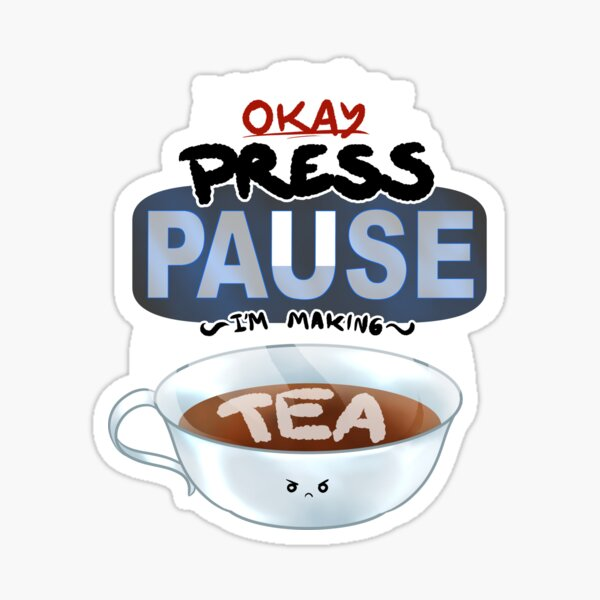

## **How To 9.1	Implementing a Class**

**A very common task is to implement a class whose objects can carry out a set of specified actions**.



As an example, consider a class Menu. An object of this class can display a menu such as

            1) Open new account
			2) Log into existing account
			3) Help
			4) Quit

**Step 1** Get an informal list of the responsibilities of your objects

In the case of the menu, you need to

			Display the menu.
			Get user input.

Now look for ***hidden*** responsibilities that aren’t part of the problem description. How do objects get created?

In the menu example, consider how a menu is produced. The programmer creates an empty menu object and then adds options “Open new account”, “Help”, and so on. That is another responsibility:

            Add an option.

**Step 2** Specify the public interface.

Turn the list in Step 1 into a set of methods, with specific parameter variables and return values.

Many programmers find this step simpler if they write out method calls that are applied to a sample object, like this:

            mainMenu = Menu()
			mainMenu.addOption("Open new account")
			# Add more options
			input = mainMenu.getInput()

Now we have a specific list of methods.

            •addOption(option)
			•getInput()

What about displaying the menu? There is no sense in displaying the menu without also asking the user for input. However, getInput may need to display the menu more than once if the user provides a bad input. Thus, display is a good candidate for a helper method.

To complete the public interface, you need to specify the constructor.

Ask yourself what information you need in order to construct an object of your class.

If you need user-supplied values, then the constructor must specify one or more parameter variables.

           
Here is the public interface:

            class Menu :
			   def __init__(self) :
			      . . .
			   def addOption(self, option) :
			      . . .
			   def getInput(self) :

**Step 3** Document the public interface.

**Step 4** Determine instance variables.

Ask yourself what information an object needs to store to do its job.

The object needs to be able to process every method using just its instance variables and the method arguments.

In our example, let’s start with the addOption method.

We clearly need to store the added menu option so that it can be displayed later as part of the menu. How should we store the options? As a list of strings? As one long string? Both approaches can be made to work. We will use a list here.

Now consider the getInput method. It shows the stored options and reads an integer.

When checking whether the input is valid, we need to know the number of menu items. Because we store them in a list, the number of menu items is simply the size of the list. If you stored the menu items in one long string, you might want to keep another instance variable to store the item count.

**Step 5** Implement the constructor.

Implement the constructor of your class, which defines and initializes the instance variables.

In this case, _options is set to an empty list.

            def __init__(self) :
			   self._options = []

**Step 6** Implement the methods.

Implement the methods in your class, one at a time, starting with the easiest ones.

For example, here is the implementation of the addOption method:

            def addOption(self, option) :
			   self._options.append(option)

Here is the getInput method. This method is a bit more sophisticated. It loops until a valid input has been obtained, displaying the menu options before reading the input:

            def getInput(self) :
			   done = False
			   while not done :
			      for i in range(len(self._options)) :
			         print("%d %s" % (i + 1, self._options[i]))

			      userChoice = int(input())
			      if userChoice >= 1 and userChoice < len(self._options) :
			         done = True

			   return userChoice

If you find that you have trouble with the implementation of some of your methods, you may need to rethink your choice of instance variables. It is common for a beginner to start out with a set of instance variables that cannot accurately describe the state of an object. Don’t hesitate to go back and rethink your implementation strategy.

**Step 7** Test your class.

# **9.8 Problem Solving: Tracing Objects**

You have seen how the technique of hand-tracing is useful for understanding how a program works. When your program contains objects, it is useful to adapt the technique so that you gain a better understanding of object data and encapsulation.

# **9.9 Problem Solving: Patterns for Object Data**

When you design a class, you first consider the needs of the programmers who use the class.

You provide the methods that the users of your class will call when they manipulate objects.

When you implement the class, you need to come up with the instance variables for the class.

It is not always obvious how to do this. Fortunately, there is a small set of recurring patterns that you can adapt when you design your own classes.

## **9.9.1 Keeping a Total**

Many classes need to keep track of a quantity that can go up or down as certain methods are called.

Examples:

    • A bank account has a balance that is increased by a deposit, decreased by a withdrawal.
	• A cash register has a total that is increased when an item is added to the sale, cleared after the end of the sale.
	• A car has gas in the tank, which is increased when fuel is added and decreased when the car drives.

In all of these cases, the implementation strategy is similar. Keep an instance variable that represents the current total.

For example, for the cash register we defined the _totalPrice instance variable.

Locate the methods that affect the total. There is usually a method to increase it by a given amount:

            def addItem(self, price) :
			   self._totalPrice = self._totalPrice + price

Depending on the nature of the class, there may be a method that reduces or clears the total. In the case of the cash register, there is a clear method:

            def clear(self) :
			   self._totalPrice = 0.0

There is usually a method that yields the current total. It is easy to implement:

            def getTotal(self) :
			   return self._totalPrice

All classes that manage a total follow the same basic pattern.

    Find the methods that affect the total and provide the appropriate code for increasing or decreasing it.
    Find the methods that report or use the total, and have those methods read the current total.

## **9.9.2 Counting Events**

You often need to count how often certain events occur in the life of an object. For example:

			•In a cash register, you want to know how many items have been added in a sale.
			•A bank account charges a fee for each transaction; you need to count them.

**A counter that counts events is incremented in methods that correspond to the events.**

Keep a counter, such as _itemCount.

Increment the counter in those methods that correspond to the events that you want to count:

            def addItem(self, price) :
			   self._totalPrice = self._totalPrice + price
			   self._itemCount = self._itemCount + 1

You may need to clear the counter, for example at the end of a sale or a statement period:

            def clear(self) :
			   self._totalPrice = 0.0
			   self._itemCount = 0


## **9.9.3 Collecting Values**

Some objects collect numbers, strings, or other objects. For example, each multiple-choice question has a number of choices. A cash register may need to store all prices of the current sale.

**An object can collect other objects in a list.**

Use a list to store the values. In the constructor, define the instance variable and initialize it to an empty container:

            def __init__(self) :
			   self._choices = []   # An empty list.

You need to supply some mechanism for adding values. It is common to provide a method for appending a value to the collection:

            def addChoice(self, choice) :
			   self._choices.append(choice)

The user of a multiple-choice Question object can call this method multiple times to add the various choices.

## **9.9.4 Managing Properties of an Object**

**An object property can be accessed with a getter method and changed with a setter method.**

A property is a value of an object that a user of that object can set and retrieve.

For example, a Student object may have a name and an ID.

Provide an instance variable to store the property’s value and write methods to get and set it.

In [ ]:
class Student :
	def __init__(self) :
	   self._name = ""

	def getName(self) :
	   return self._name

	def setName(self, newName) :
	   self._name = newName

It is common to add error checking to the setter method. For example, we may want to reject a blank name:

In [ ]:
def setName(self, newName) :
	if len(newName) > 0 :
	   self._name = newName

Some properties should not change after they have been set in the constructor.

For example, a student’s ID may be fixed (unlike the student’s name, which may change). In that case, don’t supply a setter method.

In [ ]:
class Student :
	def __init__(self, anId) :
	   self._id = anId

	def getId(self) :
	   return self._id

	# No setId method

## **9.9.5 Modeling Objects with Distinct States**

**If your object can have one of several states that affect the behavior, supply an instance variable for the current state.**

Some objects have behavior that varies depending on what has happened in the past.

For example, a Fish object may look for food when it is hungry and ignore food after it has eaten.

Such an object would need to remember whether it has recently eaten.

Supply an instance variable that models the state, together with some constants for the state values.

Determine which methods change the state. In this example, a fish that has just eaten food won’t be hungry. But as the fish moves, it will get hungrier.


Finally, determine where the state affects behavior. A fish that is very hungry will want to look for food first.

## **9.9.6 Describing the Position of an Object**

Some objects move around during their lifetime, and they remember their current position. For example,

    • A train drives along a track and keeps track of the distance from the terminus.
	• A simulated bug living on a grid crawls from one grid location to the next;
	• A cannonball is shot into the air, then descends as it is pulled by the gravitational force.

**To model a moving object, you need to store and update its position.**

Such objects need to store their position. Depending on the nature of their movement, they may also need to store their orientation or velocity.

If the object moves along a line, you can represent the position as a distance from a fixed point.

            self._distanceFromTerminus = 0.0

If the object moves in a grid, remember its current location and direction in the grid:

            self._row = 0
			self._column = 0
			self._direction = "N"

When you model a physical object such as a cannonball, you need to track both the position and the velocity, possibly in two or three dimensions.

Here we model a cannonball that is shot straight upward into the air, so that we only need to track its height, not its x- or y-position.

            self._zPosition = 0.0
			self._zVelocity = 0.0

There will be methods that update the position. In the simplest case, you may be told by how much the object moves:

            def move(self, distanceMoved) :
			   self._distanceFromTerminus = self._distanceFromTerminus + distanceMoved

If the movement happens in a grid, you need to update the row or column, depending on the current orientation:

            def moveOneUnit(self) :
			   if self._direction == "N" :
			      self._row = self._row - 1
			   elif self._direction == "E" :
			      self._column = self._column + 1

Whenever you have a moving object, keep in mind that your program will simulate the actual movement in some way.

Find out the rules of that simulation, such as movement along a line or in a grid with integer coordinates.

Those rules determine how to represent the current position. Then locate the methods that move the object, and update the positions according to the rules of the simulation.

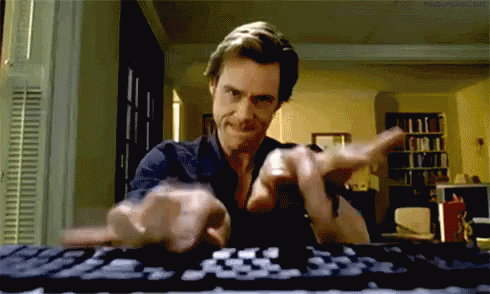

# **9.10 Object References**

In Python, a variable does not actually hold an object.

It merely holds the memory location of an object. The object itself is stored elsewhere.

**An object reference specifies the location of an object.**

We use the technical term **object reference** to denote the memory location of an object.

When a variable contains the memory location of an object, we say that it refers to an object.

For example, after the statement

            reg1 = CashRegister()

the variable reg1 refers to the CashRegister object that was constructed.

Technically speaking, the constructor returns a reference to the new object, and that reference is stored in the reg1 variable.

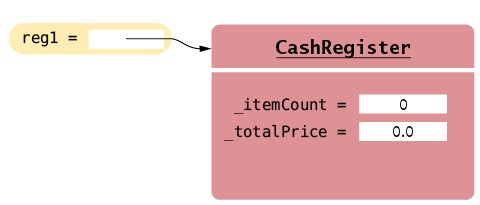

## **9.10.1 Shared References**

**Multiple object variables can contain references to the same object.**

You can have two (or more) variables that store references to the same object, for example by assigning one to the other.

            reg2 = reg1

Now you can access the same CashRegister object both as reg1 and as reg2

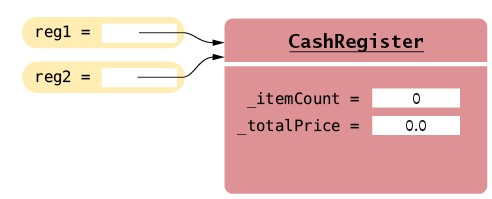

When you copy an object reference, both the original and the copy are references to the same object (see Figure 7):

            reg1 = CashRegister()  ➊
			reg2 = reg1  ➋
			reg2.addItem(2.95)  ➌

Because reg1 and reg2 refer to the same cash register after step ➋, both variables now refer to a cash register with item count 1 and total price 2.95. Two variables that refer to the same object are known as **aliases**.

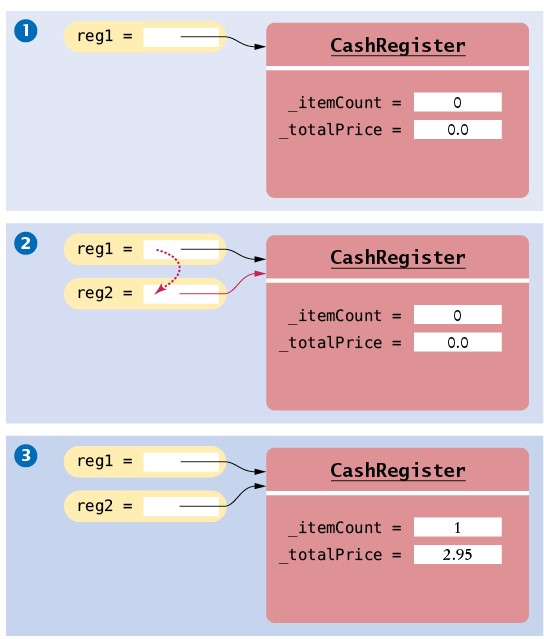

You can test whether two variables are aliases using the is (or the inverse is not) operator:

            if reg1 is reg2 :
			   print("The variables are aliases.")
			  
			if reg1 is not reg2 :
			   print("The variables refer to different objects.")

Use the is and is not operators to test whether two variables are aliases.

The is and is not operators do not check whether the data contained in the objects are equal, but whether two variables refer to the same object. Objects that contain the same data may or may not be referenced by the same variable.

For example, if we create a third cash register and add an item to it

            reg3 = CashRegister()
			reg3.addItem(2.95)

reg3 will have the same data as reg1, but the variables are not aliases because they refer to different objects.

In [ ]:
from google.colab import files

uploaded = files.upload()

In [ ]:
from cashregister import CashRegister

## **9.10.2 The None Reference**

**The None reference refers to no object.**

An object reference can have the special value None if it refers to no object at all.

It is common to use the None value to indicate that a value has never been set.

For example,

            middleInitial = None   # No middle initial

You use the is operator (and not ==) to test whether an object reference is None:

            if middleInitial is None :
			   print(firstName, lastName)
			else :
			   print(firstName, middleInitial + ".", lastName)

Note that the None reference is not the same as the empty string "". The empty string is a valid string of length 0, whereas None indicates that a variable refers to nothing at all.

It is an error to invoke a method on a None reference.

In [ ]:
trans1 = None


AttributeError: ignored

## **9.10.3 The self Reference**

**The self parameter variable refers to the object on which a method was invoked.**

Every method has a reference to the object on which the method was invoked, stored in the self parameter variable.

For example, consider the method call

            reg1.addItem(2.95) :

When the method is called, the parameter variable self refers to the same object as reg1

In [ ]:
reg1.addItem(2.95)

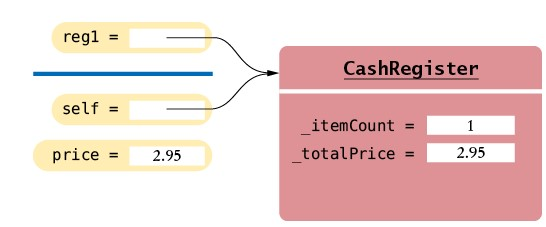

As you have seen, the self reference is used to access instance variables of the object on which the method is invoked.

For example, consider the method

            def addItem(self, price) :
			   self._itemCount = self._itemCount + 1
			   self._totalPrice = self._totalPrice + price

In the call reg1.addItem(2.95), self is initialized with the reference reg1, and price is initialized with 2.95. Then self._itemCount and self._totalPrice are the same as reg1._itemCount and reg1._totalPrice.

You can also invoke a method on self. For example, we could implement the constructor as

            def __init__(self) :
			   self.clear()

In a constructor, self is a reference to the object that is being constructed. The clear method is invoked on that object.

Finally, you sometimes pass self to another method. Suppose, for example, you have a Person class with a method likes(self, other) that checks, perhaps from a social network, whether a person likes another. Then you can define a method

            def isFriend(self, other) :
			   return self.likes(other) and other.likes(self)

Note how in the last method call, self was passed to the likes method.

## **9.10.4 The Lifetime of Objects**

When you construct an object with a constructor, the object is created, and the self variable of the constructor is set to the memory location of the object.

Initially, the object contains no instance variables. As the constructor executes statements such as

     self._itemCount = 0

instance variables are added to the object. Finally, when the constructor exits, it returns a reference to the object, which is usually captured in a variable:

            reg1 = CashRegister()

The object, and all of its instance variables, stays alive as long as there is at least one reference to it. When an object is no longer referenced at all, it is eventually removed by a part of the virtual machine called the “garbage collector”.

# **9.11 Application: Writing a Fraction Class**

## **9.11.1 Fraction Class Design**

## **9.11.2 The Constructor**

## **9.11.3 Special Methods**

## **9.11.4 Arithmetic Operations**

## **9.11.5 Logical Operations**

# **Summary**


#### **Understand the concepts of classes, objects, and encapsulation.**

• A class describes a set of objects with the same behavior.

• Every class has a public interface: a collection of methods through which the objects of the class can be manipulated.

• Encapsulation is the act of providing a public interface and hiding the implementation details.

• Encapsulation enables changes in the implementation without affecting users of a class.

#### **Understand instance variables and method implementations of a simple class.**

• An object’s instance variables store the data required for executing its methods.

• Each object of a class has its own set of instance variables.

• A method can access the instance variables of the object on which it acts.

#### **Write method headers that describe the public interface of a class.**

• You can use method headers and method comments to specify the public interface of a class.

• A mutator method changes the object on which it operates.

• An accessor method does not change the object on which it operates.

#### **Choose an appropriate data representation for a class.**

• For each accessor method, an object must either store the result or the data necessary to compute the result.

• Commonly, there is more than one way of representing the data of an object, and you must make a choice.

• Be sure that your data representation supports method calls in any order.

#### **Design and implement constructors.**

• A constructor initializes the instance variables of an object.

• The constructor is automatically called when an object is created.

• The constructor is defined using the special method name __init__.

• Default arguments can be used with a constructor to provide different ways of creating an object.

#### **Provide the implementation of instance methods for a class.**

• The object on which a method is applied is automatically passed to the self parameter variable of the method.

• In a method, you access instance variables through the self parameter variable.

• A class variable belongs to the class, not to any instance of the class.

#### **Write tests that verify that a class works correctly.**

• A unit test verifies that a class works correctly in isolation, outside a complete program.

• To test a class, use an environment for interactive testing, or write a tester program to execute test instructions.

• Determining the expected result in advance is an important part of testing.

#### **Use the technique of object tracing for visualizing object behavior.**

• Write the methods on the front of a card, and the instance variables on the back.

• Update the values of the instance variables when a mutator method is called.

#### **Use patterns to design the data representation of a class.**

• An instance variable for the total is updated in methods that increase or decrease the total amount.

• A counter that counts events is incremented in methods that correspond to the events.

• An object can collect other objects in a list.

• An object property can be accessed with a getter method and changed with a setter method.

• If your object can have one of several states that affect the behavior, supply an instance variable for the current state.

• To model a moving object, you need to store and update its position.

#### **Describe the behavior of object references.**

• An object reference specifies the location of an object.

• Multiple object variables can contain references to the same object.

• Use the is and is not operators to test whether two variables are aliases.

• The None reference refers to no object.

• The self parameter variable refers to the object on which a method was invoked.

#### **Define special methods to allow class users to use operators with objects.**

• To use a standard operator with objects, define the corresponding special method.

• Define the special __repr__ method to create a string representation of an object.